In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql

%matplotlib inline

In [32]:
police_calls = pd.read_csv('../Data/police_calls_2018.csv')

In [33]:
police_calls.head(5)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [34]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [35]:
police_calls.shape

(718021, 18)

In [36]:
police_calls.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [37]:
focused_pc = police_calls.drop(columns = ['Event Number', 'Complaint Number',
       'Block', 'Street Name', 'geometry'])

In [38]:
focused_pc.columns

Index(['Call Received', 'Shift', 'Tencode', 'Tencode Description',
       'Disposition Code', 'Disposition Description', 'Unit Dispatched',
       'Sector', 'Zone', 'Latitude', 'Longitude', 'zipcode', 'PO'],
      dtype='object')

In [39]:
focused_pc = focused_pc.rename(columns = {'Call Received' : 'call_time', 'Shift' : 'shift', 'Tencode' : 'tencode', 'Tencode Description' : 'tencode_desc',
       'Disposition Code' : 'disposition', 'Disposition Description' : 'disposition_desc', 'Unit Dispatched' : 'unit_dispatched',
       'Sector' : 'sector', 'Zone' : 'zone', 'Latitude' : 'lat', 'Longitude' : 'lng', 'zipcode' : 'zipcode', 'PO' : 'po'})

In [40]:
focused_pc.disposition_desc.unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

In [41]:
valid_dis_pc = focused_pc[focused_pc.disposition_desc.isin(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN'])]

In [42]:
tencode_counts = focused_pc.drop(columns = ['call_time', 'shift','disposition',
       'disposition_desc', 'unit_dispatched', 'sector', 'zone', 'lat', 'lng',
       'zipcode', 'po', 'tencode'])

In [43]:
tencode_counts = tencode_counts.value_counts()

In [44]:
tencode_counts = tencode_counts.reset_index()

In [45]:
tencode_counts.columns = ['tencode', 'tencode_count']

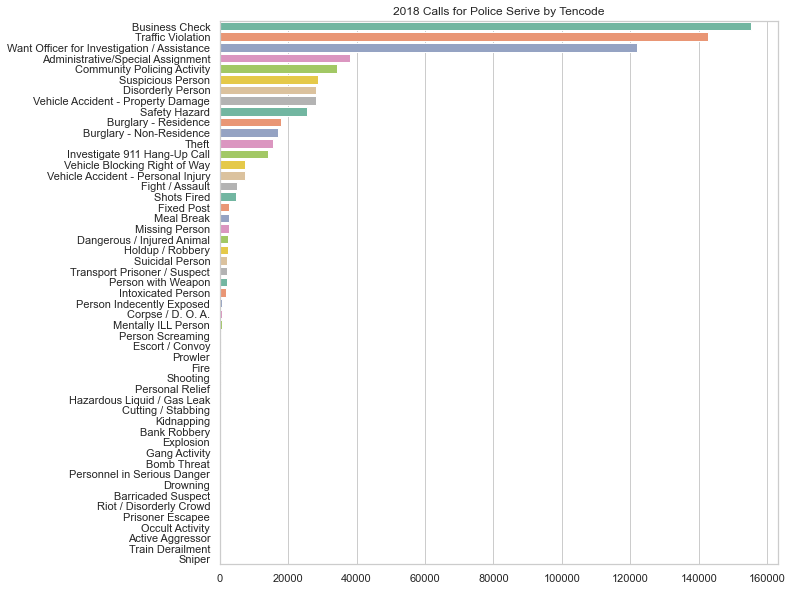

In [46]:
plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot(x = 'tencode_count', y = 'tencode', data=tencode_counts, palette = 'Set2')
plt.xlabel('')
plt.ylabel('')
plt.title('2018 Calls for Police Serive by Tencode');

In [47]:
tencode_zip = focused_pc.drop(columns = ['call_time', 'shift','disposition',
       'disposition_desc', 'unit_dispatched', 'sector', 'zone', 'lat', 'lng', 'po', 'tencode'])

In [48]:
tencode_zip

,tencode_desc,zipcode
0,Traffic Violation,37076
1,Traffic Violation,37076
2,Administrative/Special Assignment,37076
3,Safety Hazard,37076
4,Traffic Violation,37076
...,...,...
718016,Traffic Violation,37027
718017,Burglary - Residence,37027
718018,Vehicle Accident - Property Damage,37027
718019,Want Officer for Investigation / Assistance,37143


In [49]:
tencode_zip = tencode_zip.reset_index()

In [50]:
tencode_zip['zipcode'] = tencode_zip.zipcode.astype(str)

In [51]:
tencode_zip = tencode_zip.drop(columns = ['index'])

In [52]:
tencode_zip.columns = ['tencode', 'zipcode']

<Figure size 2880x2880 with 0 Axes>

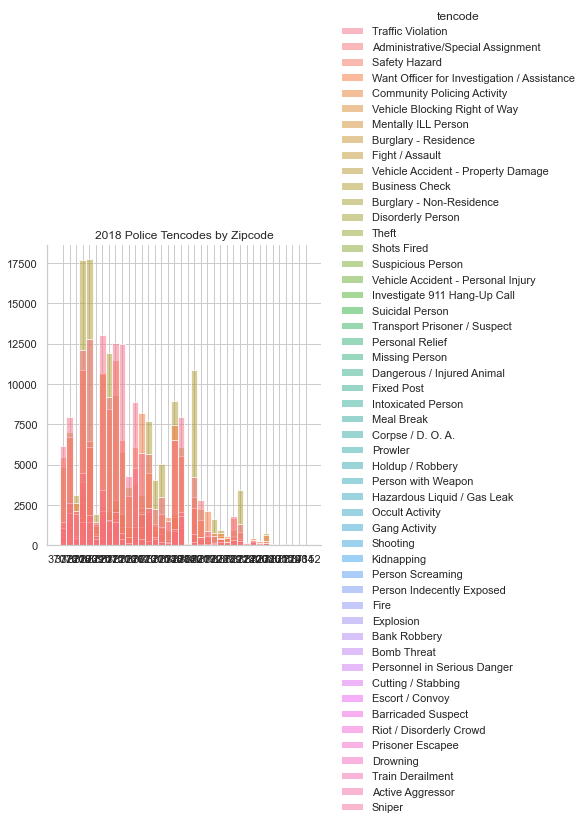

In [53]:
plt.figure(figsize = (40, 40))
sns.set(style="whitegrid")
sns.displot(tencode_zip, x="zipcode", hue="tencode")
plt.xlabel('')
plt.ylabel('')
plt.title('2018 Police Tencodes by Zipcode');

Text(0, 0.5, 'Count')

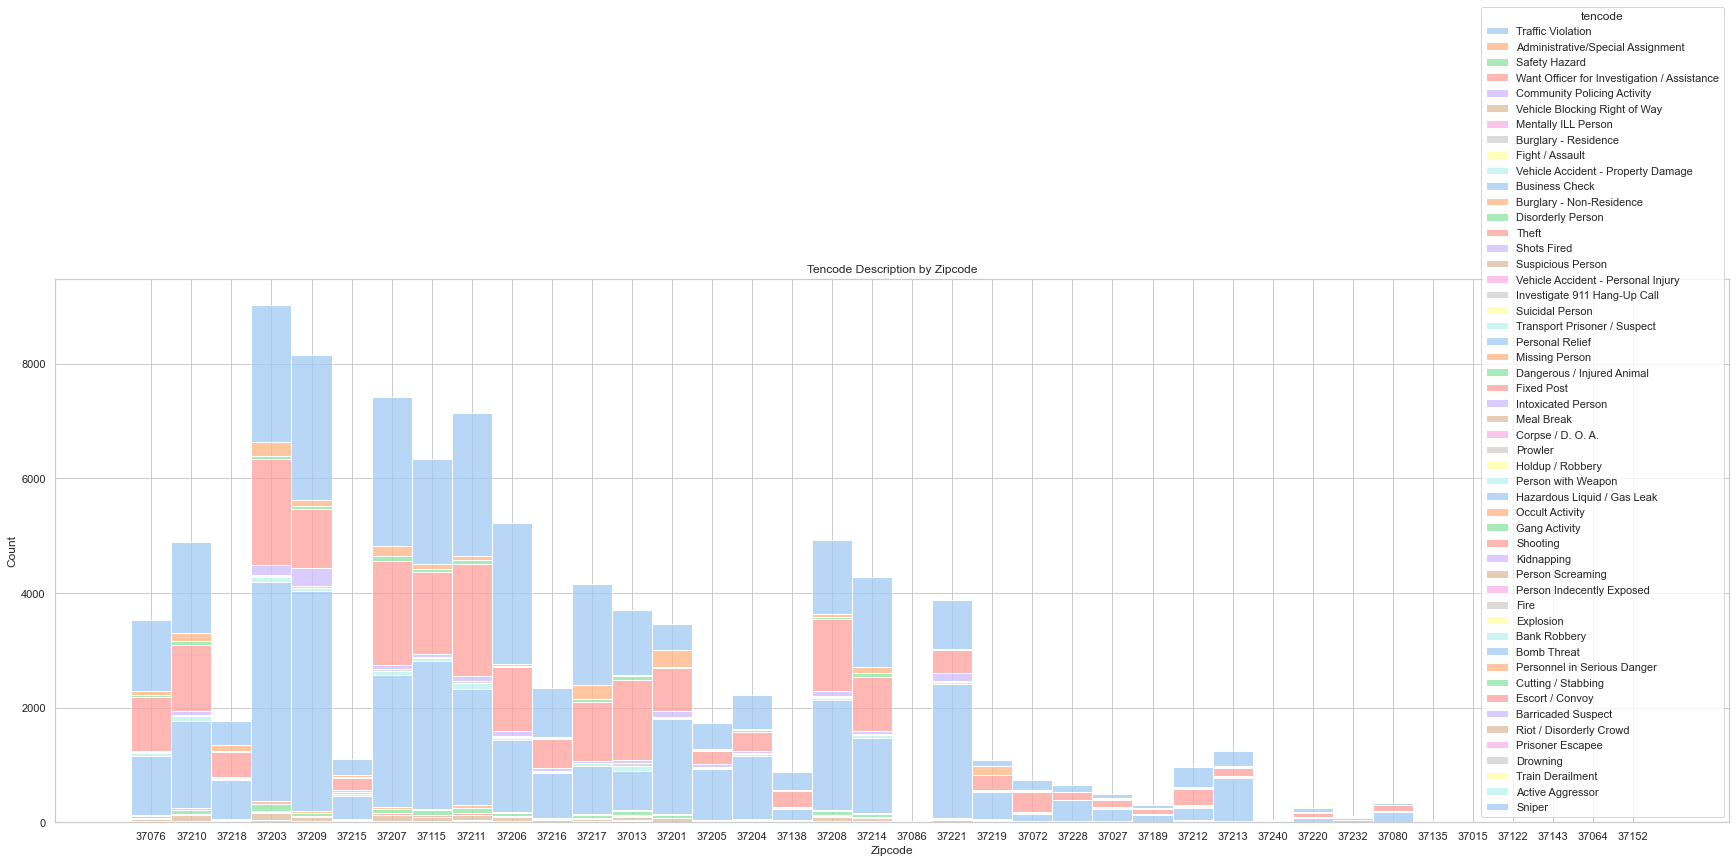

In [54]:
f = plt.figure(figsize=(30,10))
ax = f.add_subplot(1,1,1)

sns.histplot(data=tencode_zip, ax=ax, stat="frequency", multiple="stack",
            x="zipcode", kde=False,
            palette="pastel", hue="tencode",
            element="bars", legend=True)
ax.set_title("Tencode Description by Zipcode")
ax.set_xlabel("Zipcode")
ax.set_ylabel("Count")

In [57]:
police_calls_dt = focused_pc

In [58]:
police_calls_dt['call_time'] = pd.to_datetime(police_calls_dt['call_time'])

In [59]:
police_calls_dt['month'] = police_calls_dt['call_time'].dt.month

In [64]:
police_calls_dt.month.value_counts()

1    95780
3    91051
5    86463
8    84690
6    84619
2    82796
4    75798
7    67231
9    49593
Name: month, dtype: int64

In [70]:
test = police_calls_dt.sort_values('call_time')

In [74]:
test

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,month
583263,2018-01-01 00:00:00,C,83,Shots Fired,10,NO RESPONSE,613C,N,15,36.169,-86.798,37208,NASHVILLE,1
550600,2018-01-01 00:00:00,C,96,Business Check,12,LOCATION/BUILDING SECURE,821C,MT,23,36.127,-86.778,37204,NASHVILLE,1
583222,2018-01-01 00:00:00,C,96,Business Check,12,LOCATION/BUILDING SECURE,7F62,C,13,36.175,-86.785,37208,NASHVILLE,1
345368,2018-01-01 00:00:00,C,96,Business Check,12,LOCATION/BUILDING SECURE,311C,S,13,36.113,-86.746,37211,NASHVILLE,1
393243,2018-01-01 00:01:00,C,93,Traffic Violation,9,SUBJECT WARNED,5153,E,13,36.183,-86.749,37206,NASHVILLE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376249,2018-09-21 03:06:48,C,93,Traffic Violation,3,CITATION - TRAFFIC,3F24,S,23,36.084,-86.689,37211,NASHVILLE,9
692801,2018-09-21 03:07:13,C,96,Business Check,12,LOCATION/BUILDING SECURE,627C,N,27,36.277,-86.819,37189,WHITES CREEK,9
464499,2018-09-21 03:08:21,C,43,Want Officer for Investigation / Assistance,4,ASSISTED CITIZEN,325C,S,25,36.079,-86.647,37217,NASHVILLE,9
208189,2018-09-21 03:10:02,C,93,Traffic Violation,9,SUBJECT WARNED,113C,W,11,36.159,-86.827,37209,NASHVILLE,9
